# Bayesian optimization for calibrating transient vapor compression cycles

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from simulateModel import simulateModel
from BayOpt_GRF import BayOpt_GRF, mui

## Chiller

In [3]:
# parameter bound
lb = np.array([1233.3, 1233.3, 1233.3, 1365.4, 65573, 8867.3, 8867.3, 6118.9, 61943, 50])
ub = np.array([123330, 123330, 123330, 136540, 196719, 886730, 886730, 611890, 247770, 150])

model_path = "\\nas01.itap.purdue.edu\puhome\My Documents\Downloads\DynamicVCC-issue2_JM\DynamicVCC-issue2_JM\DynamicVCC\package.mo"
model = "DynamicVCC.Examples.Chiller.Cycle"
startTime = 2000
stopTime = 3500
outputInterval = 10
outputWeight = [1.] * 7
outputWeight[4] = 2. # large weight for superheat
simulation = simulateModel(model_path, model, startTime, stopTime, outputInterval, lb, ub, outputWeight)

In [ ]:
# test simulation
# u_test = [5e4, 8e4, 5e4, 2e4, 131146, 8e4, 5e4, 2e4, 123886.44, 100]
# simulation.instantiate_dymola()
# cost, outputVar= simulation.run_dymola(u_test)
# simulation.close_dymola()

### Generate samples for GRF 

1 -0.9321259494115856
2 -0.0822391471994986
3 -0.3892512280764692
4 -1.0551503623636391
5 -1.0871577616772279
6 -0.09788396992253799
7 0.15637203700957078
[108067.91, 48240.53, 26670.11, 14206.99, 172456.99, 493154.89, 604350.83, 378668.13, 145255.44, 103.83]
Simulation failed. Below is the translation log.
Failed
 = false, {}

8 nan
9 1.8890861700266453
10 -0.8680645902820098
11 0.5640831938986244
12 -0.5476285171622465
13 -0.7440061966913653
14 -0.9083059511250889
15 -0.8852380740127963
16 -0.7257245386445216
17 -1.0456880776865605
18 -0.3493330292012756
19 -0.7680534999189043
20 -1.1973718338816877
21 -0.8053613912015213
[87311.47, 71845.89, 6320.66, 129555.98, 71037.42, 194681.57, 396589.99, 287802.46, 91985.03, 97.83]
Simulation failed. Below is the translation log.
Failed
 = false, {}

22 nan
23 -0.6471475537898022
24 -0.5820388494863666
25 -0.725049922830945
26 1.473672532483716
27 -0.7654236370839439
28 -0.8933147434975085
29 -0.8312106987922204
30 -0.682293163392989
31 -0.8696

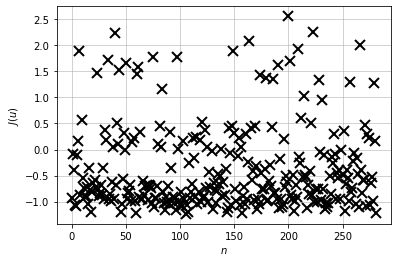

In [4]:
simulation.instantiate_dymola()
n = 300
save_path = 'results/chiller/YX_chiller.npz'
simulation.generate_samples(n, save_path)
simulation.close_dymola()

### Discover GRF

iteration 0:, error=0.18025374855640836, E_var=0.5424311981754483
iteration 1:, error=0.18025329131580878, E_var=0.5423943123263955
iteration 2:, error=0.18025331096559008, E_var=0.5423961547267042
iteration 3:, error=0.18025330294644165, E_var=0.5423955320490949
iteration 4:, error=0.1802532879626965, E_var=0.5423941944446986
iteration 5:, error=0.18025352960076926, E_var=0.542413853576506
iteration 6:, error=0.18025471699110038, E_var=0.5424941595734767
iteration 7:, error=0.18025420866872582, E_var=0.5424650718859347
iteration 8:, error=0.18025401349415426, E_var=0.5424510011776299
iteration 9:, error=0.1802535374553101, E_var=0.5424149717322673
dimension m=1 prediction error r=0.1802532879626965, expectation of posterior variance on test data: 0.5423941944446986
--------------------------------------------------
iteration 0:, error=0.08365704437693687, E_var=0.3734614579597211
iteration 1:, error=0.083657238020905, E_var=0.3734670099098229
iteration 2:, error=0.08365602265499474, E

c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 1:, error=0.3918610023830658, E_var=0.902698158317801
iteration 2:, error=0.4514300630004669, E_var=0.7640601944319108
iteration 3:, error=0.4328577477256312, E_var=0.6051078061120895
iteration 4:, error=0.18380109575600753, E_var=0.325087023514504
iteration 5:, error=0.4269960397896719, E_var=1.1460075203690092
iteration 6:, error=0.08473737828801532, E_var=0.37718204746335576
iteration 7:, error=0.17954929592781704, E_var=0.6198358378925982
iteration 8:, error=0.31131240522197834, E_var=0.9330226792385539
iteration 9:, error=0.18854597597334488, E_var=0.40366167277511833
dimension m=8 prediction error r=0.08473737828801532, expectation of posterior variance on test data: 0.37718204746335576
--------------------------------------------------
iteration 0:, error=0.2640322107633026, E_var=0.48993663295284573


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 1:, error=0.47015052259658774, E_var=1.074141107449905
iteration 2:, error=0.42699604256475016, E_var=1.1459918858717133
iteration 3:, error=0.42675894185740676, E_var=1.138394178140143
iteration 4:, error=0.4256704747463072, E_var=1.1311631719942659


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 5:, error=0.42699604256475016, E_var=1.1460079114766408
iteration 6:, error=0.42699603993643626, E_var=1.1460078519159889
iteration 7:, error=0.4191672194971291, E_var=1.0216046490657595
iteration 8:, error=0.4342839043565969, E_var=1.1357155100607028
iteration 9:, error=0.2440245367441241, E_var=0.6452345624619713
dimension m=9 prediction error r=0.2440245367441241, expectation of posterior variance on test data: 0.6452345624619713
--------------------------------------------------


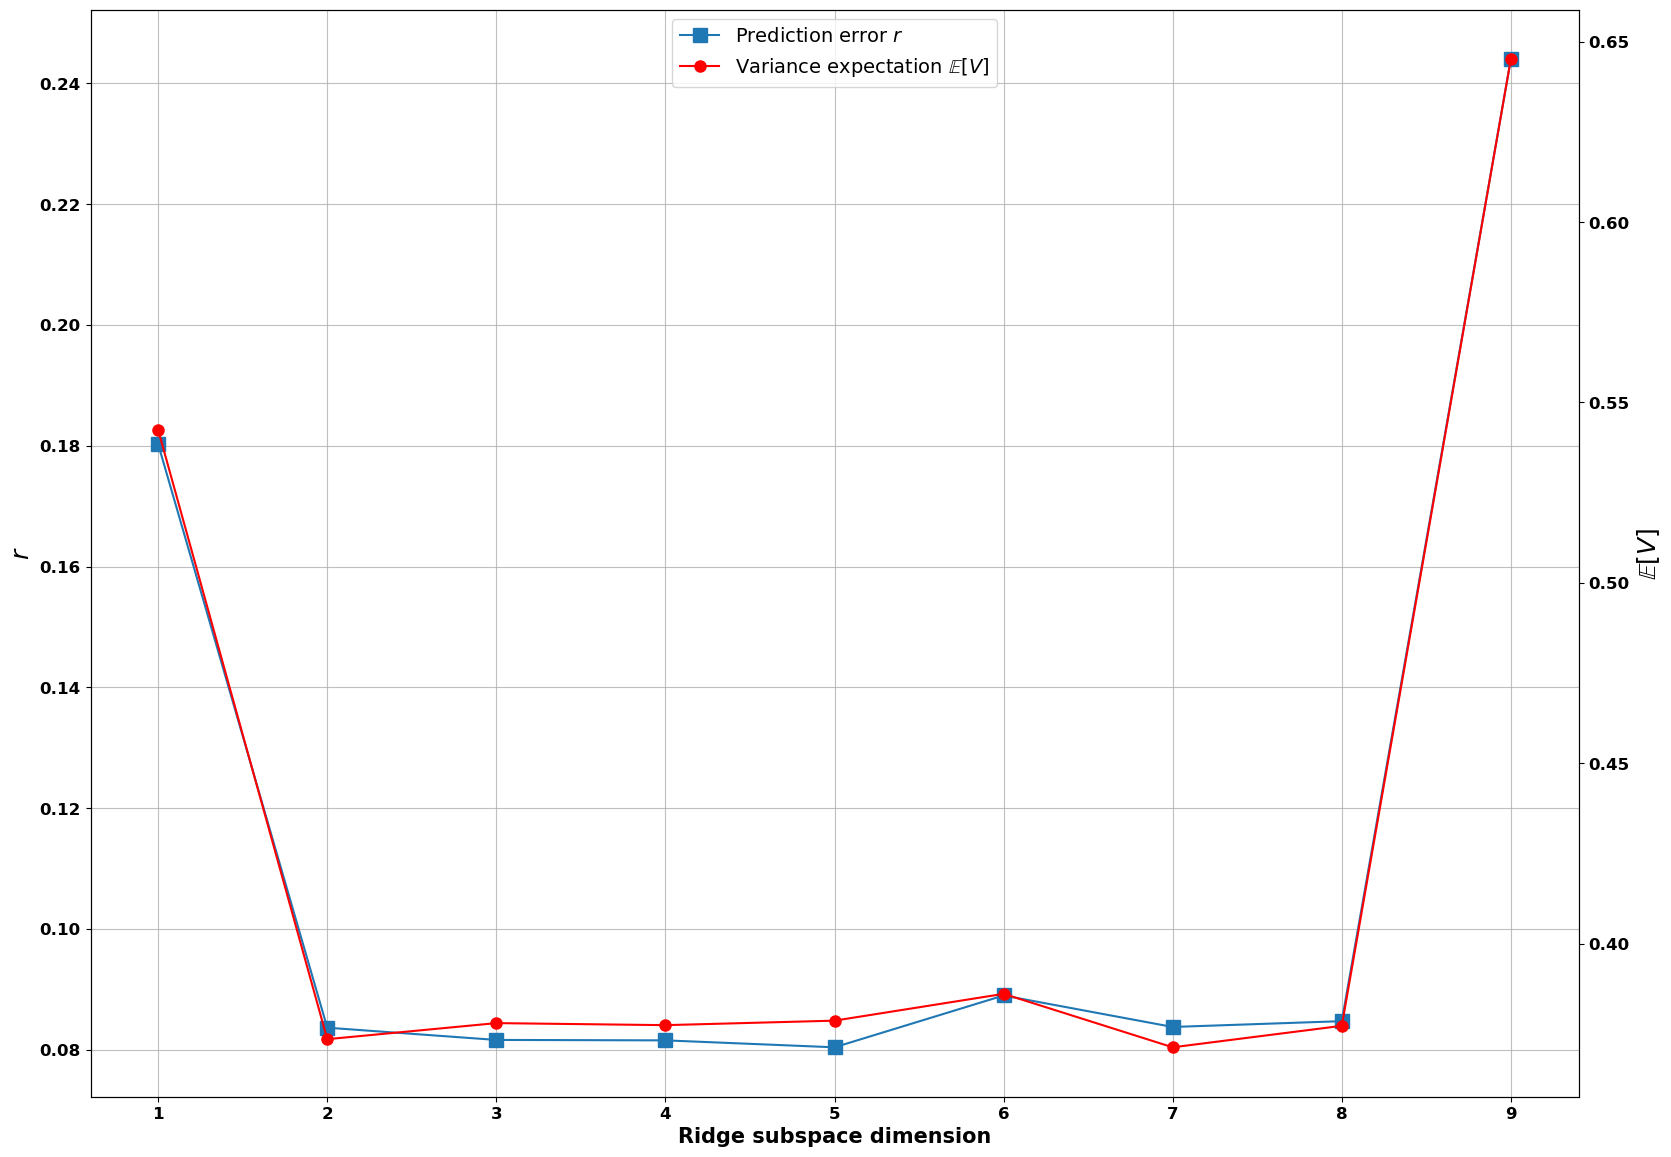

In [14]:
data_path = 'results/chiller/YX_chiller.npz'
XY_data = np.load(data_path)
X_normalize = XY_data['X_normalize']
Y = XY_data['Y']

# YX_data = np.loadtxt('../../YX_ChillerCycle.txt', delimiter=',')
# Y = YX_data[:,0]
# X_normalize = YX_data[:,1:]

alpha_fun = mui # information acquisition function
BO = BayOpt_GRF(X_normalize, Y, simulation, alpha_fun)
grf_all, M_all, gpr_all, r_all, E_eva_all = BO.train_grf(X_normalize.shape[1], n_restart=10, tol=1e-2)

In [15]:
print(f'r={r_all}')
print(f'E_var={E_eva_all}')
for i in range(len(r_all)):
    print(f'kernel[{i+1}]={grf_all[i].kernel}')

for i in range(len(r_all)):
    print(f'M[{i+1}]={M_all[i]}')

r=[0.1802532879626965, 0.08365602265499474, 0.08163026665014254, 0.08155761229926492, 0.08040946817825163, 0.08898652287445667, 0.08377469767585659, 0.08473737828801532, 0.2440245367441241]
E_var=[0.5423941944446986, 0.37347767008514626, 0.3779348472592115, 0.3773683860363367, 0.37861443021818214, 0.38604125142716794, 0.37122650340888114, 0.37718204746335576, 0.6452345624619713]
kernel[1]=2.39**2 * RBF(length_scale=1.11) + WhiteKernel(noise_level=0.531)
kernel[2]=2.33**2 * RBF(length_scale=[1.07, 0.296]) + WhiteKernel(noise_level=0.342)
kernel[3]=2.53**2 * RBF(length_scale=[1.15, 0.337, 5.64]) + WhiteKernel(noise_level=0.343)
kernel[4]=2.49**2 * RBF(length_scale=[3.56e+04, 0.329, 6, 1.13]) + WhiteKernel(noise_level=0.342)
kernel[5]=2.01**2 * RBF(length_scale=[0.519, 0.884, 545, 1.06, 2.07]) + WhiteKernel(noise_level=0.326)
kernel[6]=2.43**2 * RBF(length_scale=[0.32, 1e+05, 2.53e+04, 4.42e+04, 1.13, 2.17e+04]) + WhiteKernel(noise_level=0.355)
kernel[7]=2.32**2 * RBF(length_scale=[0.444,

In [19]:
np.savez('allDimensionResult.npz', r_all=np.array(r_all), E_var_all=np.array(E_eva_all))

### GRF performance

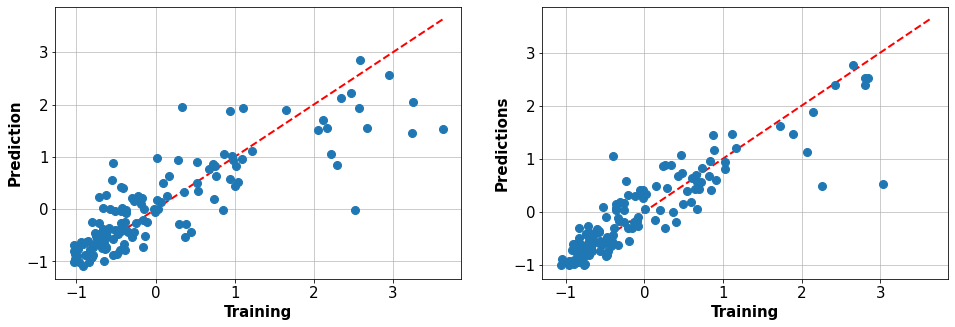

In [20]:
dim_final = 2
grf_final = grf_all[dim_final-1]
# performance on training and testing data
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
_x = np.linspace(grf_final.y_train.min(), grf_final.y_train.max())
ax[0].plot(_x, _x, 'r--', label='$x=y$', linewidth=2)
ax[0].plot(grf_final.y_train, grf_final.pred(grf_final.X_train)[:,None], 'o', markersize=8)
ax[0].set_xlabel('Training', fontsize=15, fontweight='bold')
ax[0].set_ylabel('Prediction', fontsize=15, fontweight='bold')
ax[0].tick_params(labelsize=15)
ax[0].grid(alpha=0.8)

ax[1].plot(_x, _x, 'r--', label='$x=y$', linewidth=2)
_x = np.linspace(grf_final.y_test.min(), grf_final.y_test.max())
ax[1].plot(grf_final.y_test, grf_final.pred(grf_final.X_test)[:,None], 'o', markersize=8)
ax[1].set_xlabel('Training', fontsize=15, fontweight='bold')
ax[1].set_ylabel('Predictions', fontsize=15, fontweight='bold')
ax[1].tick_params(labelsize=15)
ax[1].grid(alpha=0.8)

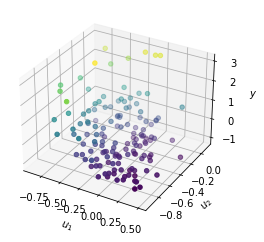

In [21]:
# plot ridge function for 2D
ax = plt.figure().add_subplot(projection='3d')
U_test = grf_all[1].X_test @ grf_all[1].M # using optimized M
ax.scatter(U_test[:,0], U_test[:,1], grf_all[1].y_test, c=grf_all[1].y_test)
ax.set_xlabel('$u_1$')
ax.set_ylabel('$u_2$')
ax.set_zlabel('$y$')
plt.show()

### Run Bayesian Optimization

1 2.699568785317361
2 2.9344398572662698
3 2.986664980432364
4 3.1986111773214625
5 2.986664980432364
6 3.1986111773214625
7 3.0278223667187536
8 3.1130146367149605
9 3.1986111773214625
10 3.1986111773214625
11 3.0278223667187536
12 3.6167547490130088
13 3.6167547490130088
14 3.6167547490130088
15 3.6167547490130088
16 3.6167547490130088
17 3.6167547490130088
18 3.6167547490130088
19 3.6167547490130088
20 3.6167547490130088
21 3.6167547490130088
22 3.6167547490130088
23 3.6167547490130088
24 3.6167547490130088
25 3.6167547490130088
26 3.6167547490130088
27 3.6167547490130088
28 3.6167547490130088
29 3.6167547490130088
30 3.6167547490130088


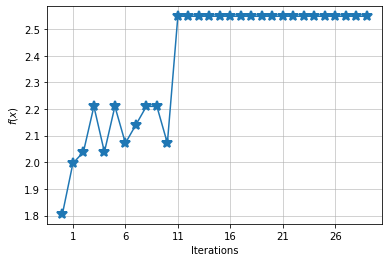

In [7]:
# testing points
n_design = int(1e6)
X_design_normalize = np.random.rand(n_design, BO.Xdata.shape[1])
# number of iterations
n_iter = 30
# run 
gpr, af_all, x_all, y_all = BO.runBO(grf_final, X_design_normalize, n_iter)
np.savez('BOresults.npz', af_all=af_all, x_all=x_all, y_all=y_all)

In [22]:
x_optimal = x_all[-1] * (ub - lb) + lb
print(x_optimal)

[1.21000067e+05 1.14288143e+05 9.99739913e+04 1.22046029e+05
 8.41889236e+04 1.37760744e+04 7.94799445e+05 1.77823532e+04
 7.36207346e+04 1.44237819e+02]


In [28]:
np.savez('results/chiller/BOresults.npz', x_all=np.array(x_all), y_all=np.array(y_all))

## ASHP

In [3]:
# parameter bound
lb = np.array([500, 500, 500, 10, 500, 500, 10, 2086.67, 10857.15, 0.0029]) # lower bound
ub = np.array([2e4, 2e4, 2e4, 100, 2e4, 2e4, 100, 6260.01, 32571.45, 0.0087]) # upper bound

model_path = "\\nas01.itap.purdue.edu\puhome\My Documents\Downloads\DynamicVCC-issue2_JM\DynamicVCC-issue2_JM\DynamicVCC\package.mo"
model = "DynamicVCC.Examples.GreenspeedASHP.GreenSpeedCycle"
startTime = 6000
stopTime = 10000
outputInterval = 1
outputWeight = [1.] * 6
simulation = simulateModel(model_path, model, startTime, stopTime, outputInterval, lb, ub, outputWeight)

### test simulation

In [15]:
# test simulation
# u_test = np.array([0.5525, 0.8675, 0.7025, 0.2425, 0.0875, 0.4375, 0.9325, 0.8875, 0.8175, 0.4575])
# simulation.instantiate_dymola()
# cost = simulation.J_calib(u_test)
# simulation.close_dymola()

### Generate samples

1 0.5029282639040717
[2011.25, 4643.75, 8641.25, 64.68, 14978.75, 4351.25, 14.73, 5060.17, 18728.58, 0.0]
Simulation failed. Below is the translation log.
Failed
Not possible to open file "dsres.mat": No such file or directory
 = false, {}

2 nan
3 4.794382779971501
4 5.663898175566009
5 3.2099974559218034
[4058.75, 13613.75, 4741.25, 58.38, 9128.75, 15173.75, 26.88, 6124.38, 15362.87, 0.0]
Simulation failed. Below is the translation log.
Failed
Not possible to open file "dsres.mat": No such file or directory
 = false, {}

6 nan
[6008.75, 938.75, 17416.25, 14.73, 17903.75, 15563.75, 61.52, 4830.64, 24157.16, 0.0]
Simulation failed. Below is the translation log.
Failed
Not possible to open file "dsres.mat": No such file or directory
 = false, {}

7 nan
8 4.062425876401754
9 1.0192856375720825
[19561.25, 19951.25, 13321.25, 50.72, 11176.25, 13711.25, 31.38, 5727.91, 14928.58, 0.0]
Simulation failed. Below is the translation log.
Failed
Not possible to open file "dsres.mat": No such file 

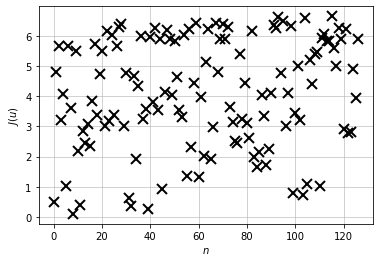

In [6]:
simulation.instantiate_dymola()
n = 200
save_path = 'results/heat pump/YX_Greenspeed.npz'
simulation.generate_samples(n, save_path)
simulation.close_dymola()

### Discover GRF

iteration 0:, error=0.4639783393156271, E_var=0.823497433918805
iteration 1:, error=0.514027478404278, E_var=0.9856761087016508
iteration 2:, error=0.4754833696390328, E_var=0.9664965270204732
iteration 3:, error=0.4734350786265681, E_var=0.9655616078671779
iteration 4:, error=0.4964195555964407, E_var=1.0072935192317545


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 5:, error=0.5265759340831971, E_var=0.9663208325388916
iteration 6:, error=0.11678737327577035, E_var=0.3801375091409279
iteration 7:, error=0.4199201185167021, E_var=0.8657104332514525
iteration 8:, error=0.505720944230309, E_var=0.704848703499506
iteration 9:, error=0.11624315251223064, E_var=0.38226947432050795
iteration 10:, error=0.1162923348357259, E_var=0.38332073211595497
iteration 11:, error=0.5110580836128487, E_var=0.8841232768345927
iteration 12:, error=0.4874742000672833, E_var=0.9991117187618015
iteration 13:, error=0.34098630910044353, E_var=0.6352151567737476
iteration 14:, error=0.11624253221059247, E_var=0.3820928584845492
iteration 15:, error=0.46758754654754325, E_var=0.8595859619215823
iteration 16:, error=0.49628961614935, E_var=1.0113771548676747
iteration 17:, error=0.4440435406386888, E_var=0.9616882710823904
iteration 18:, error=0.4806646714805813, E_var=0.7836506719541207
iteration 19:, error=0.11625446689078398, E_var=0.3827946817450267
dimension m

c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 5:, error=0.4964195555964407, E_var=1.007293497325092
iteration 6:, error=0.21561903383089787, E_var=0.48979741770116986
iteration 7:, error=0.5290709419483192, E_var=0.7105328120359737
iteration 8:, error=0.6203275649364096, E_var=0.40635431962526974
iteration 9:, error=0.021767770809001972, E_var=0.13042830948551232
iteration 10:, error=0.46956501213227697, E_var=0.8970883115797117
iteration 11:, error=0.5730577141262538, E_var=0.6679828025643652
iteration 12:, error=0.4589282182152842, E_var=0.773579185762995
iteration 13:, error=0.48688528846951595, E_var=0.8473976776040002
iteration 14:, error=0.21808504662382158, E_var=0.49851258342574234
iteration 15:, error=0.48443488509689947, E_var=0.8974089989158829
iteration 16:, error=0.5295540746611783, E_var=0.8930316168980262
iteration 17:, error=0.269641522848648, E_var=0.4427814999147129
iteration 18:, error=0.02855484677386758, E_var=0.2322396567474351
iteration 19:, error=0.4964195555964407, E_var=1.0078263259106577
dimens

c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (
c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 3:, error=0.4964195555964407, E_var=1.0072934983373032
iteration 4:, error=0.519441375262494, E_var=0.733102981178847
iteration 5:, error=0.5027209387561098, E_var=0.9104101030031189
iteration 6:, error=0.4964195541764889, E_var=1.0072932991857884
iteration 7:, error=0.4889057538379531, E_var=0.9645207451530922
iteration 8:, error=0.4964187570963453, E_var=1.0072888407854586
iteration 9:, error=0.537702782337912, E_var=0.8161691203816511
iteration 10:, error=0.48509980057040564, E_var=0.8491197179485269
iteration 11:, error=0.04141887449941938, E_var=0.10554826835236449
iteration 12:, error=0.49882058025254705, E_var=0.7723349984699567
iteration 13:, error=0.3785107254440097, E_var=0.7515107947258425
iteration 14:, error=0.48562633542952666, E_var=0.9970699212755418
iteration 15:, error=0.5011553325789476, E_var=0.9176558374127624
iteration 16:, error=0.4823069933201189, E_var=0.9498584676894439
iteration 17:, error=0.2788702594059657, E_var=0.5278783323763799


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (
c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 18:, error=0.48284296699942375, E_var=0.8331321726814
iteration 19:, error=0.4603291056457443, E_var=0.9555509641647572
dimension m=7 prediction error r=0.04141887449941938, expectation of posterior variance on test data: 0.10554826835236449
--------------------------------------------------
iteration 0:, error=0.5172501803959295, E_var=0.9941246520229582
iteration 1:, error=0.4964195564562212, E_var=1.0072934962127102
iteration 2:, error=0.5092372251127029, E_var=0.683752572712954
iteration 3:, error=0.49824217709192886, E_var=1.0055621955738874
iteration 4:, error=0.5233732517536441, E_var=0.9093038221534486


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 5:, error=0.43776936651919635, E_var=0.5722231436974077
iteration 6:, error=0.48534228197638574, E_var=0.9890512510619935
iteration 7:, error=0.49926014714058775, E_var=0.9951084915253691
iteration 8:, error=0.5165366088359903, E_var=0.5318068521625458
iteration 9:, error=0.4717157381158903, E_var=0.5007660635448328
iteration 10:, error=0.4964182165381459, E_var=1.0072934554238435
iteration 11:, error=0.5330667210413441, E_var=0.2009691360540938
iteration 12:, error=0.48445612854000375, E_var=0.9863986518890951
iteration 13:, error=0.49642069925044263, E_var=1.007293205052791
iteration 14:, error=0.08983467149358562, E_var=0.2823958485341032
iteration 15:, error=0.49937439330063893, E_var=0.7212048710708361


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 16:, error=0.47820587415320903, E_var=0.9260209690933902
iteration 17:, error=0.4964195555964407, E_var=1.0072934976193768
iteration 18:, error=0.4964195622638653, E_var=1.0072932466762992
iteration 19:, error=0.6852739695541339, E_var=0.5835780099532302
dimension m=8 prediction error r=0.08983467149358562, expectation of posterior variance on test data: 0.2823958485341032
--------------------------------------------------
iteration 0:, error=0.45628729437324445, E_var=0.6025997656639533
iteration 1:, error=0.167844590692632, E_var=0.3177163957364525
iteration 2:, error=0.4964195555964407, E_var=1.0072934965360651


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (
c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 3:, error=0.5445559057309132, E_var=0.934836750231781
iteration 4:, error=0.06443907324315977, E_var=0.09875499516211245
iteration 5:, error=0.05115202929278444, E_var=0.24955152850246143
iteration 6:, error=0.4695083635965951, E_var=0.32066013202452387


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 7:, error=0.4964194293975313, E_var=1.0072934559586535
iteration 8:, error=0.4481491999915536, E_var=0.6482461748289915
iteration 9:, error=0.09513106007227266, E_var=0.2466696662662723
iteration 10:, error=0.31444664284825635, E_var=0.5419954440770008


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 11:, error=0.06423867455515896, E_var=0.20889648613840608


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 12:, error=0.517174938116325, E_var=0.9880359286267736
iteration 13:, error=0.064877180443519, E_var=0.2245686059191727
iteration 14:, error=0.152069206970538, E_var=0.43602332466986793
iteration 15:, error=0.5087969597398049, E_var=0.9584656466812642


c:\Users\ma516\Anaconda3\envs\BayOpt\lib\site-packages\pymanopt\optimizers\trust_regions.py:526: RuntimeWarning: invalid value encountered in double_scalars
  tau = (


iteration 16:, error=0.1860102334508043, E_var=0.29910532918094596
iteration 17:, error=0.4964195555964407, E_var=1.0072934957387125
iteration 18:, error=0.2553622130838285, E_var=0.17983792999564582
iteration 19:, error=0.5477593834810897, E_var=0.4063160351400778
dimension m=9 prediction error r=0.05115202929278444, expectation of posterior variance on test data: 0.24955152850246143
--------------------------------------------------
iteration 0:, error=0.20384555128616275, E_var=0.23656350416502575
iteration 1:, error=0.15069909369535925, E_var=0.19000507766818117
iteration 2:, error=0.17838754575200677, E_var=0.29801772181075176
iteration 3:, error=0.17901600901281298, E_var=0.32085816750773133
iteration 4:, error=0.2089660293743959, E_var=0.21202866462377853
iteration 5:, error=0.2772022323088431, E_var=0.26283721289576667
iteration 6:, error=0.22763388443719818, E_var=0.22117048722219843
iteration 7:, error=0.21885626088811783, E_var=0.18739536127508963
iteration 8:, error=0.13310

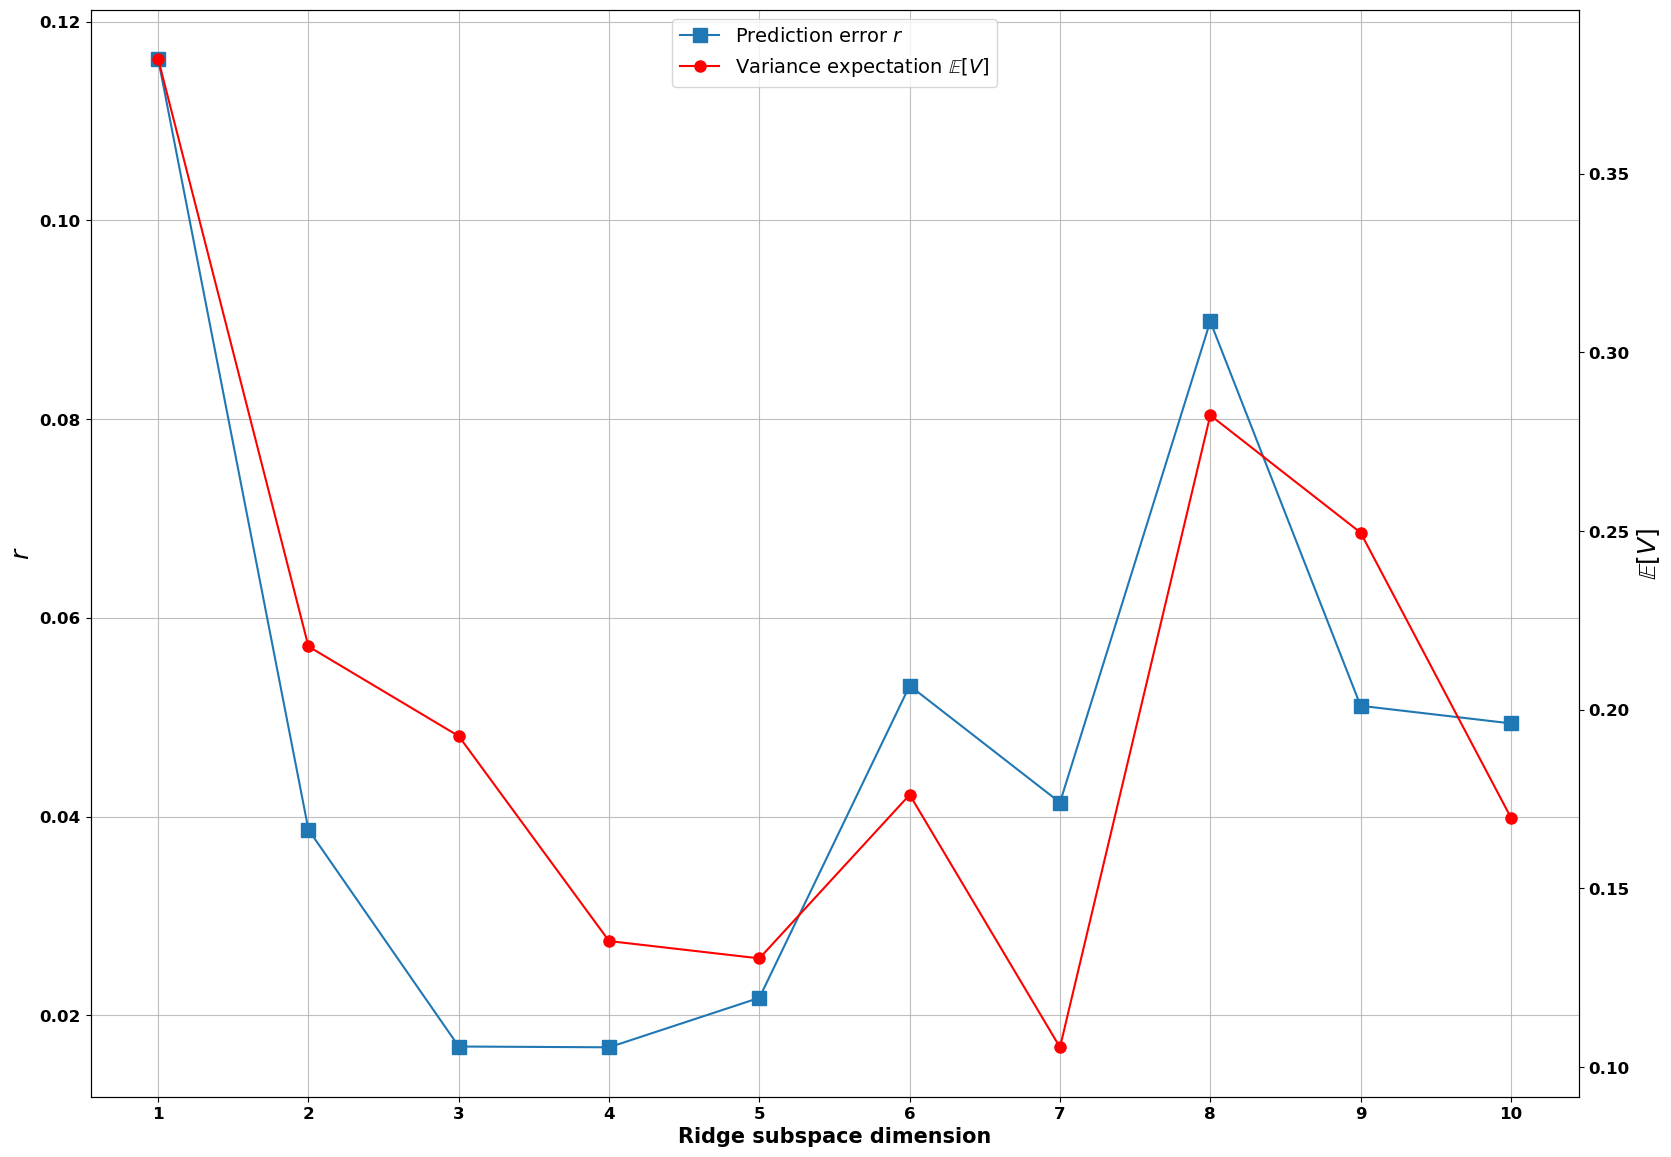

In [4]:
YX_data = np.loadtxt('../../YX_Greenspeed.txt', delimiter=',')
Y = YX_data[:,0]
X_normalize = YX_data[:,1:]

# file_name = 'results/heat pump/YX_Greenspeed.npz'
# YX_data = np.load(file_name)
# Y = YX_data["Y"]
# X_normalize = YX_data["X_normalize"]

alpha_fun = mui # information acquisition function
BO = BayOpt_GRF(X_normalize, Y, simulation, alpha_fun)
grf_all, M_all, gpr_all, r_all, E_eva_all = BO.train_grf(X_normalize.shape[1], n_restart=20, tol=1e-1)

In [5]:
print(f'r={r_all}')
print(f'E_var={E_eva_all}')
for i in range(len(r_all)):
    print(f'kernel[{i+1}]={grf_all[i].kernel}')

for i in range(len(r_all)):
    print(f'M[{i+1}]={M_all[i]}')

np.savez('results/heat pump/allDimensionResult.npz', r_all=np.array(r_all), E_var_all=np.array(E_eva_all))

r=[0.11624253221059247, 0.038679351725074286, 0.016866896811859593, 0.0167873542502293, 0.021767770809001972, 0.05317681220462224, 0.04141887449941938, 0.08983467149358562, 0.05115202929278444, 0.04938118396658657]
E_var=[0.3820928584845492, 0.21770999708517347, 0.19261385441899773, 0.1352703565773822, 0.13042830948551232, 0.17621568142363925, 0.10554826835236449, 0.2823958485341032, 0.24955152850246143, 0.1698248047065906]
kernel[1]=1.08**2 * RBF(length_scale=0.377) + WhiteKernel(noise_level=0.349)
kernel[2]=1.18**2 * RBF(length_scale=[0.216, 0.726]) + WhiteKernel(noise_level=0.166)
kernel[3]=1.21**2 * RBF(length_scale=[0.646, 0.25, 0.646]) + WhiteKernel(noise_level=0.0948)
kernel[4]=1.27**2 * RBF(length_scale=[0.232, 1.01, 1.17, 1.42e+04]) + WhiteKernel(noise_level=0.0905)
kernel[5]=1.38**2 * RBF(length_scale=[910, 0.237, 1.46, 0.957, 6.12e+03]) + WhiteKernel(noise_level=0.0853)
kernel[6]=1.54**2 * RBF(length_scale=[0.539, 0.759, 3.7e+03, 2.7e+03, 5.02e+03, 0.605]) + WhiteKernel(nois

### GRF Performance

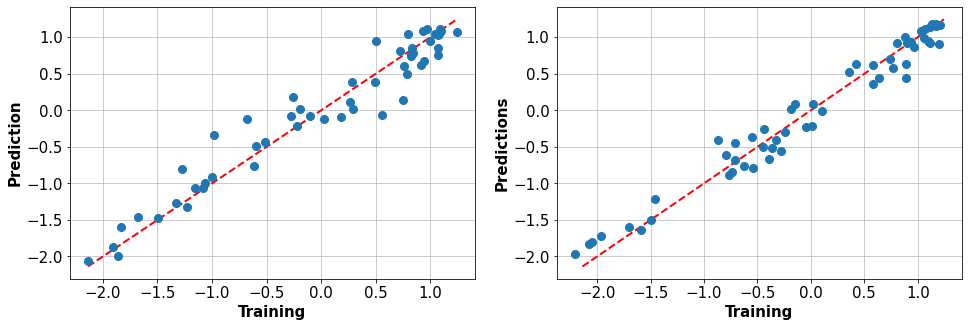

In [8]:
dim_final = 3
grf_final = grf_all[dim_final-1]
# performance on training and testing data
fig, ax = plt.subplots(1, 2, figsize=(16, 5))
_x = np.linspace(grf_final.y_train.min(), grf_final.y_train.max())
ax[0].plot(_x, _x, 'r--', label='$x=y$', linewidth=2)
ax[0].plot(grf_final.y_train, grf_final.pred(grf_final.X_train)[:,None], 'o', markersize=8)
ax[0].set_xlabel('Training', fontsize=15, fontweight='bold')
ax[0].set_ylabel('Prediction', fontsize=15, fontweight='bold')
ax[0].tick_params(labelsize=15)
ax[0].grid(alpha=0.8)

ax[1].plot(_x, _x, 'r--', label='$x=y$', linewidth=2)
_x = np.linspace(grf_final.y_test.min(), grf_final.y_test.max())
ax[1].plot(grf_final.y_test, grf_final.pred(grf_final.X_test)[:,None], 'o', markersize=8)
ax[1].set_xlabel('Training', fontsize=15, fontweight='bold')
ax[1].set_ylabel('Predictions', fontsize=15, fontweight='bold')
ax[1].tick_params(labelsize=15)
ax[1].grid(alpha=0.8)

### Run Bayesian Optimization

1 6.046414194278371
2 5.939312771291347
3 6.041938100371548
4 3.029772504090177
5 5.662663648723117
6 6.1959536213516415
7 6.1959536213516415
8 6.23655989253315
9 6.23655989253315
10 6.23655989253315
11 6.133410199244348
12 6.2580258516389495
13 5.662663648723117
14 6.353372058638517
15 6.353372058638517
16 6.353372058638517
17 6.353372058638517
18 6.353372058638517
19 6.353372058638517
20 6.353372058638517
21 6.353372058638517
22 6.353372058638517
23 6.353372058638517
24 6.353372058638517
25 6.353372058638517
26 6.353372058638517
27 6.353372058638517
28 6.353372058638517
29 6.353372058638517
30 6.353372058638517
31 6.353372058638517
32 6.353372058638517
33 6.353372058638517
34 6.353372058638517
35 6.353372058638517
36 6.353372058638517
37 6.353372058638517
38 6.353372058638517
39 6.353372058638517
40 6.353372058638517
41 6.353372058638517
42 6.353372058638517
43 6.353372058638517
44 6.353372058638517
45 6.353372058638517
46 6.353372058638517
47 6.353372058638517
48 6.353372058638517
4

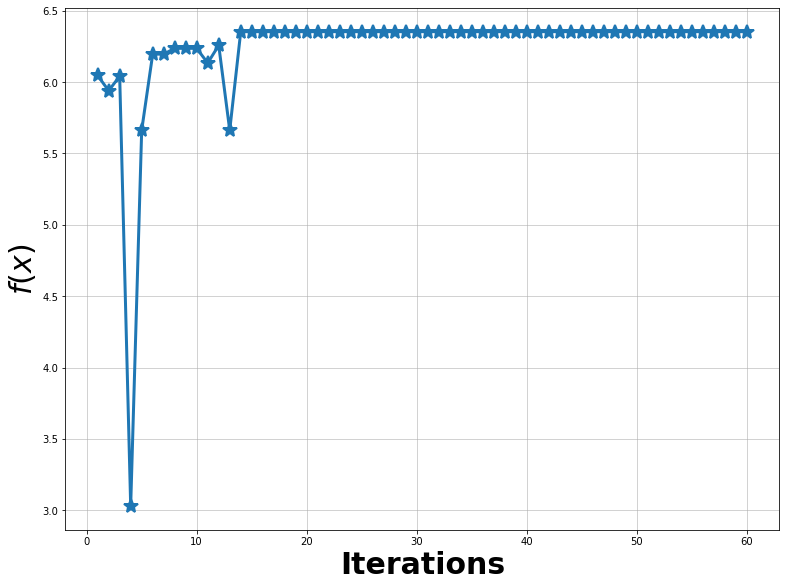

In [12]:
# testing points
n_design = int(1e6)
X_design_normalize = np.random.rand(n_design, BO.Xdata.shape[1])
# number of iterations
n_iter = 60
# run 
gpr, af_all, x_all, y_all = BO.runBO(grf_final, X_design_normalize, n_iter)
np.savez('results/heat pump/BOresults.npz', af_all=af_all, x_all=x_all, y_all=y_all)

In [5]:
simulation.lb + (simulation.ub - simulation.lb) * X_design_normalize[100]

NameError: name 'X_design_normalize' is not defined

In [8]:
Y.argmax()

115

In [9]:
simulation.lb + (simulation.ub - simulation.lb) * X_normalize[Y.argmax()]

array([1.50762500e+04, 8.64125000e+03, 6.00875000e+03, 6.06250000e+01,
       1.22487500e+04, 1.30287500e+04, 8.67250000e+01, 2.51443735e+03,
       1.62314392e+04, 5.64050000e-03])